Lending Club Loan Data Analysis
Project 1 

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Tasks:

1.     Exploratory data analysis of different factors of the dataset.

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

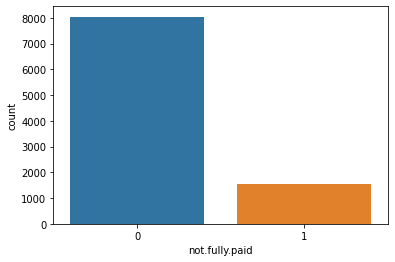

In [8]:
# Distribution of bad loans

sns.countplot(x='not.fully.paid', data=df);

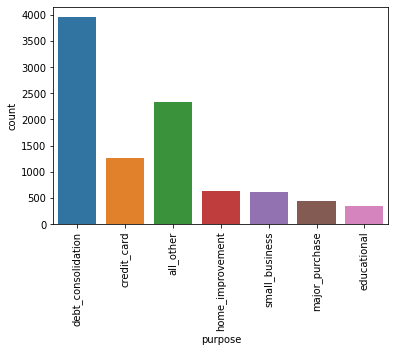

In [9]:
sns.countplot(x='purpose', data=df);
plt.xticks(rotation=90);

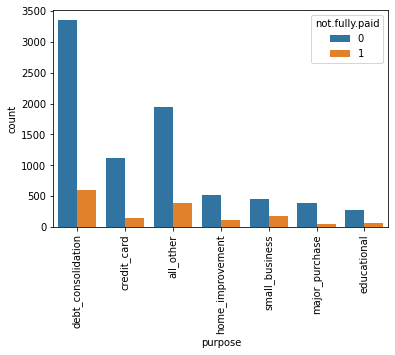

In [10]:
sns.countplot(x='purpose', hue='not.fully.paid', data=df);
plt.xticks(rotation=90);

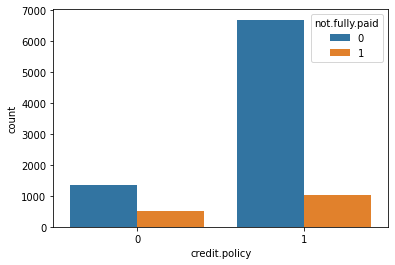

In [11]:
sns.countplot(x='credit.policy', hue='not.fully.paid', data=df);

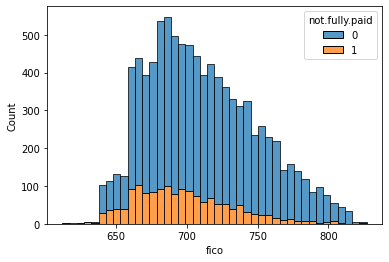

In [12]:
sns.histplot(data=df, x="fico", hue='not.fully.paid', multiple="stack");

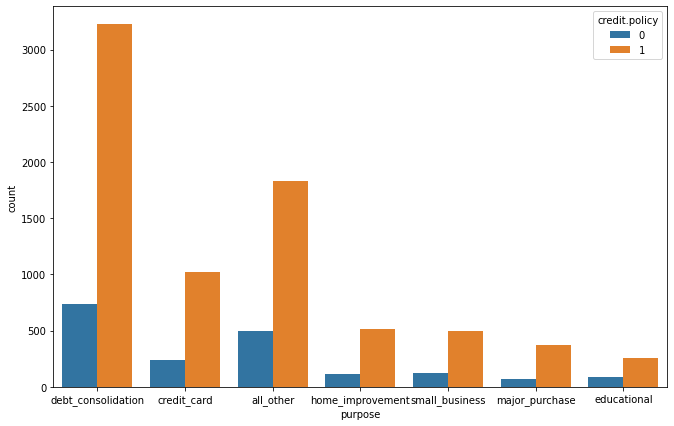

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='credit.policy',data=df);

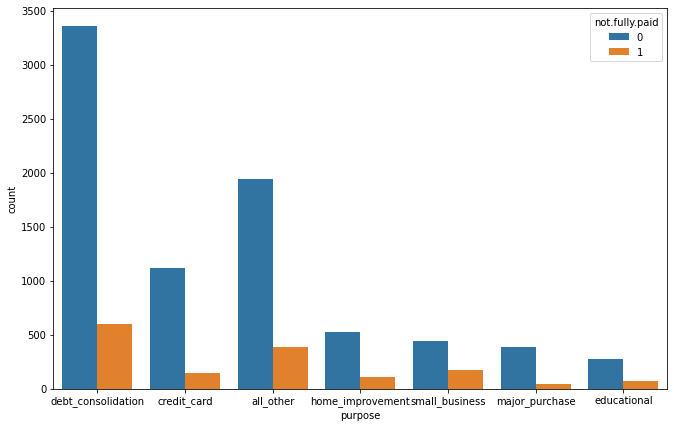

In [14]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df);

2.     Feature Transformation

Transform categorical values into numerical values (discrete)

In [3]:

df = pd.get_dummies(df,columns=['purpose'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [6]:
df_scaled.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,-0.195030,0.014676,0.186397,0.004412,-5.431539e-03,0.069933,0.144608,0.552230,0.010336,0.288735,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.729538,0.769803,0.838900,6.411147e-01,0.690373,0.858052,2.241075,0.600713,1.100123,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,-1.000000,-1.687500,-0.941588,-4.613831,-1.179511e+00,-1.727273,-1.361168,-0.570689,-0.958592,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.494565,-0.391015,-0.505499,-5.077998e-01,-0.454545,-0.453594,-0.359104,-0.490683,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.272463e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.505435,0.608985,0.494501,4.922002e-01,0.545455,0.546406,0.640896,0.509317,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,2.562500,2.495200,4.911410,1.610710e+00,2.181818,4.639175,79.585925,1.505176,16.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# get features correlated with each other

c = df_scaled.corr().abs()

c_unstacked = c.unstack()
c_sorted = c_unstacked.sort_values(kind='quicksort')
c_sorted[c_sorted < 1].tail(10)

installment     log.annual.inc    0.448102
log.annual.inc  installment       0.448102
int.rate        revol.util        0.464837
revol.util      int.rate          0.464837
inq.last.6mths  credit.policy     0.535511
credit.policy   inq.last.6mths    0.535511
fico            revol.util        0.541289
revol.util      fico              0.541289
fico            int.rate          0.714821
int.rate        fico              0.714821
dtype: float64

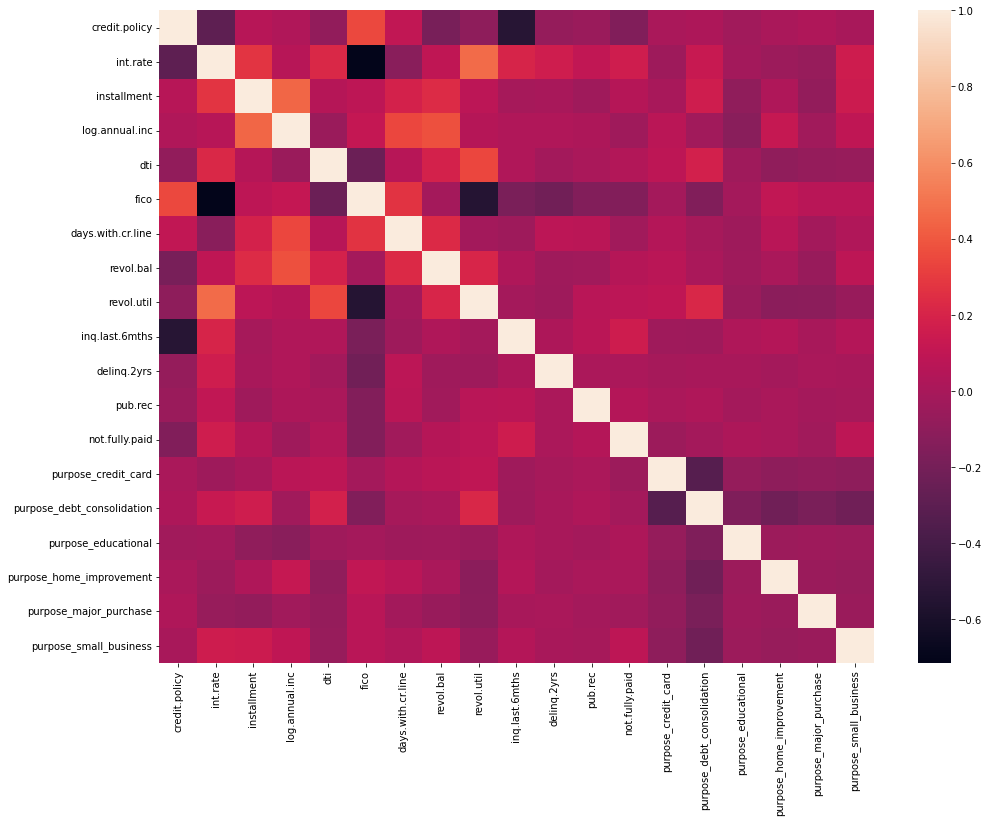

In [8]:
plt.figure(figsize=[16,12])
sns.heatmap(df_scaled.corr());

In [9]:
print(df_scaled.corr().round(2))

                            credit.policy  int.rate  installment  \
credit.policy                        1.00     -0.29         0.06   
int.rate                            -0.29      1.00         0.28   
installment                          0.06      0.28         1.00   
log.annual.inc                       0.03      0.06         0.45   
dti                                 -0.09      0.22         0.05   
fico                                 0.35     -0.71         0.09   
days.with.cr.line                    0.10     -0.12         0.18   
revol.bal                           -0.19      0.09         0.23   
revol.util                          -0.10      0.46         0.08   
inq.last.6mths                      -0.54      0.20        -0.01   
delinq.2yrs                         -0.08      0.16        -0.00   
pub.rec                             -0.05      0.10        -0.03   
not.fully.paid                      -0.16      0.16         0.05   
purpose_credit_card                  0.00     -0

In [10]:
# remove: fico
df_scaled = df_scaled.drop(columns=['fico'])
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   float64
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   float64
 7   revol.util                  9578 non-null   float64
 8   inq.last.6mths              9578 non-null   float64
 9   delinq.2yrs                 9578 non-null   float64
 10  pub.rec                     9578 non-null   float64
 11  not.fully.paid              9578 non-null   float64
 12  purpose_credit_card         9578 non-null   float64
 13  purpose_debt_consolidation  9578 

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
X = df_scaled.drop('not.fully.paid', axis=1).values
y = df_scaled['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

##### Imbalanced Data 

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [20]:
from collections import Counter

In [31]:
print(sorted(Counter(y_train_resampled).items()))

[(0.0, 5631), (1.0, 5631)]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [35]:
model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

early_stop = EarlyStopping(
            monitor='val_loss',
            mode='min',
            verbose=1,
            patience=25)

model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=256, 
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/300
44/44 [==============================] - 1s 5ms/step - loss: 0.7165 - accuracy: 0.5004 - val_loss: 0.6851 - val_accuracy: 0.4015
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5288 - val_loss: 0.6865 - val_accuracy: 0.3733
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5478 - val_loss: 0.6730 - val_accuracy: 0.4134
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5683 - val_loss: 0.6651 - val_accuracy: 0.4353
Epoch 5/300
44/44 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5707 - val_loss: 0.6650 - val_accuracy: 0.4443
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5836 - val_loss: 0.6600 - val_accuracy: 0.4569
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5825 - val_loss: 0.6551 - val_accuracy: 0.4725
Epoch 8/300
4

Epoch 59/300
44/44 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.6476 - val_loss: 0.6241 - val_accuracy: 0.6246
Epoch 60/300
44/44 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6532 - val_loss: 0.6238 - val_accuracy: 0.6204
Epoch 61/300
44/44 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6488 - val_loss: 0.6180 - val_accuracy: 0.6340
Epoch 62/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6470 - val_loss: 0.6149 - val_accuracy: 0.6340
Epoch 63/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6411 - val_loss: 0.6187 - val_accuracy: 0.6305
Epoch 64/300
44/44 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6502 - val_loss: 0.6194 - val_accuracy: 0.6260
Epoch 65/300
44/44 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6503 - val_loss: 0.6191 - val_accuracy: 0.6249
Epoch 

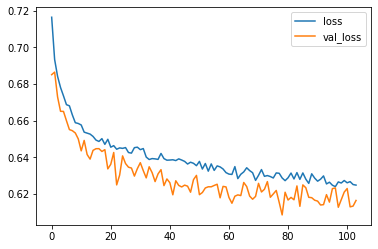

In [36]:
pd.DataFrame(model.history.history)[['loss', 'val_loss']].plot();

In [37]:
pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, pred),
     "\n",
     classification_report(y_test, pred))

[[1532  882]
 [ 179  281]] 
               precision    recall  f1-score   support

         0.0       0.90      0.63      0.74      2414
         1.0       0.24      0.61      0.35       460

    accuracy                           0.63      2874
   macro avg       0.57      0.62      0.54      2874
weighted avg       0.79      0.63      0.68      2874

